In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns
import pandas as pd

In [7]:
load_tx = False
if load_tx:
    dataPath = '/data/LLMs/willet/regression_results/44-6v-8_20_tx/'
else:
    dataPath = '/data/LLMs/willet/regression_results/44-6v-8_20_pow/'

In [8]:
def load_results(model_names, model_labels, val):
    if val:
        session = np.load('/data/LLMs/willet/val_sess.npy')
    else:
        session = np.load('/data/LLMs/willet/session.npy')
    r2 = []
    label = []
    sess_arr = []
    for m, l in zip(model_names, model_labels):
        for sess in np.unique(session):
            r2.append(np.mean(np.load(f'/data/LLMs/willet/regression_results/{m}/r2_{sess}.npy')))
            label.append(l)
            sess_arr.append(sess)
            
    simple_perf_comp = pd.DataFrame({'R2': r2, 'Predictors': label, 'Sess': sess_arr})
    return simple_perf_comp

def plot_perf(data, saveName):
    plt.figure(figsize=(10,8))
    sns.barplot(data=data, y='R2', hue='Predictors')
    plt.xlabel("Out sample R2", fontsize=16)
    plt.ylabel("Number of sessions", fontsize=16)
    plt.savefig(f"/home2/ebrahim/neural_seq_decoder/figures/{saveName}", dpi=300, bbox_inches='tight')
    plt.show()

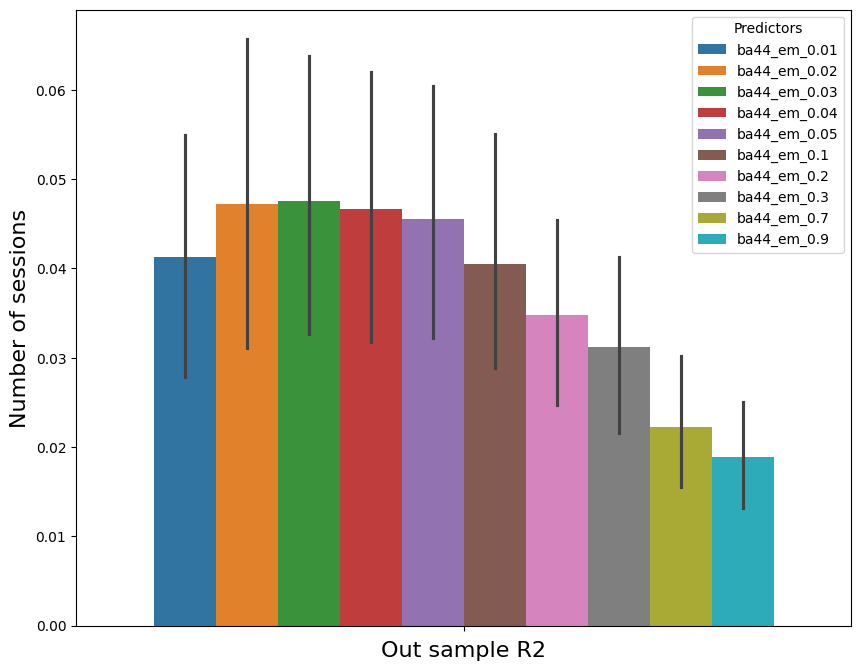

In [23]:
alphas = [1e-2, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.7, 0.9]
load_dat_em = [f'ba44_em_{a}' for a in alphas]
data_pd_em = load_results(load_dat_em, load_dat_em, val=True)
plot_perf(data_pd_em, 'Scratch')

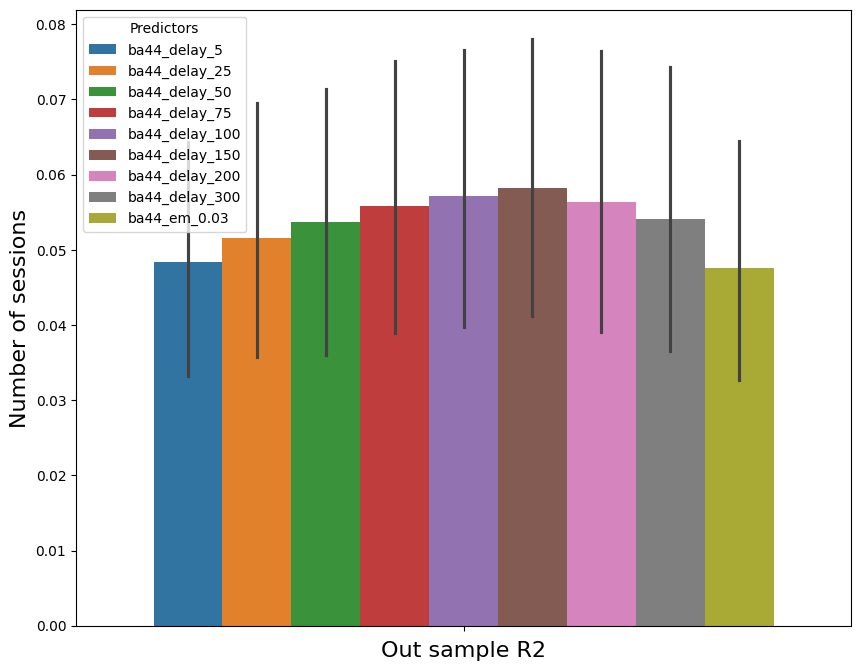

In [44]:
delays = [5,25,50,75,100,150,200,300]
load_dat_delay = [f'ba44_delay_{d}' for d in delays]
load_dat_delay.append('ba44_em_0.03')
data_pd_delay = load_results(load_dat_delay, load_dat_delay, val=True)
plot_perf(data_pd_delay, 'Scratch')

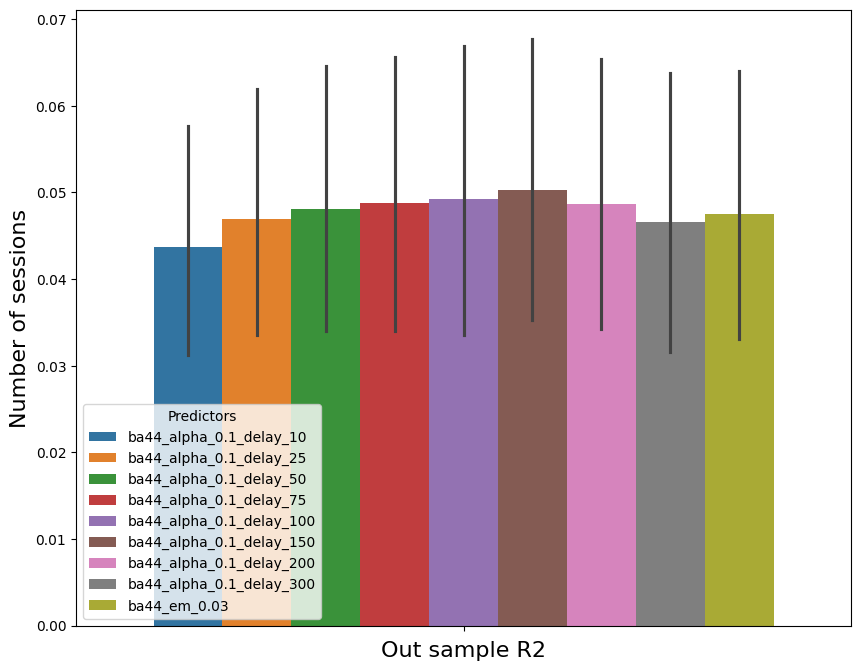

In [46]:
delays = [10,25,50,75,100,150,200,300]
load_dat_delay = [f'ba44_alpha_0.1_delay_{d}' for d in delays]
load_dat_delay.append('ba44_em_0.03')
data_pd_delay = load_results(load_dat_delay, load_dat_delay, val=True)
plot_perf(data_pd_delay, 'Scratch')

In [ ]:
delays = [10,25,50,75,100,150,200,300]
load_dat_delay = [f'ba44_alpha_0.2_delay_{d}' for d in delays]
load_dat_delay.append('ba44_em_0.03')
data_pd_delay = load_results(load_dat_delay, load_dat_delay, val=True)
plot_perf(data_pd_delay, 'Scratch')

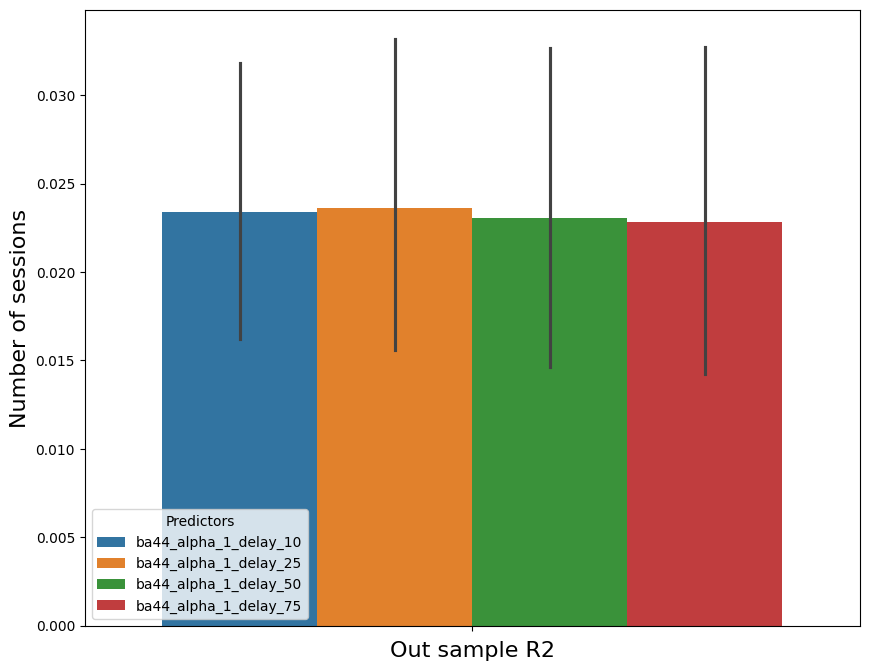

In [40]:
delays = [10,25,50,75,100,150,200,300]
load_dat_delay = [f'ba44_alpha_0.4_delay_{d}' for d in delays]
load_dat_delay.append('ba44_em_0.03')
data_pd_delay = load_results(load_dat_delay, load_dat_delay, val=True)
plot_perf(data_pd_delay, 'Scratch')

In [ ]:
delays = [10,25,50,75,100,150,200,300]
load_dat_delay = [f'ba44_alpha_0.6_delay_{d}' for d in delays]
load_dat_delay.append('ba44_em_0.03')
data_pd_delay = load_results(load_dat_delay, load_dat_delay, val=True)
plot_perf(data_pd_delay, 'Scratch')